In [9]:
!unzip -o ../data/pepe/archive.zip -d ../data/pepe/ && mv ../data/pepe/data/* ../data/pepe/ && rm -r ../data/pepe/data

Archive:  ../data/pepe/archive.zip
  inflating: ../data/pepe/data/000000_pepe_mandelbrot.jpg  
  inflating: ../data/pepe/data/000001_pepe_purple_bladerunner.jpg  
  inflating: ../data/pepe/data/000002_pepe_sad_comfy_wearing_confident_face_mask.jpg  
  inflating: ../data/pepe/data/000003_pepe_loser_forehead.jpg  
  inflating: ../data/pepe/data/000004_pepe_federal_pepe_investigator.jpg  
  inflating: ../data/pepe/data/000005_pepe_small_ivankas_hands.jpg  
  inflating: ../data/pepe/data/000006_pepe_kid_in_front_of_american_flag.jpg  
  inflating: ../data/pepe/data/000007_pepe_crying_closed_eyes_wearing_beats.jpg  
  inflating: ../data/pepe/data/000008_pepe_market_decline_graph.jpg  
  inflating: ../data/pepe/data/000009_pepe_bateman_makes_fun_of_jannie_doing_it_for_free.jpg  
  inflating: ../data/pepe/data/000010_pepe_hot_iron_phone.jpg  
  inflating: ../data/pepe/data/000011_pepe_smiling_smoking_reefer.jpg  
  inflating: ../data/pepe/data/000012_pepe_suit_reading_glasses_sideburns.jpg  


In [10]:
!unzip -o ../data/random/archive.zip -d ../data/random/ && mv ../data/random/unsplash-images-collection/* ../data/random/ && rm -r ../data/random/unsplash-images-collection

Archive:  ../data/random/archive.zip
  inflating: ../data/random/unsplash-images-collection/photo-1433162653888-a571db5ccccf.jpg  
  inflating: ../data/random/unsplash-images-collection/photo-1458571037713-913d8b481dc6.jpg  
  inflating: ../data/random/unsplash-images-collection/photo-1459255418679-d6424da9ee33.jpg  
  inflating: ../data/random/unsplash-images-collection/photo-1461800919507-79b16743b257.jpg  
  inflating: ../data/random/unsplash-images-collection/photo-1461896836934-ffe607ba8211.jpg  
  inflating: ../data/random/unsplash-images-collection/photo-1464695110811-dcf3903dc2f4.jpg  
  inflating: ../data/random/unsplash-images-collection/photo-1470058869958-2a77ade41c02.jpg  
  inflating: ../data/random/unsplash-images-collection/photo-1471086569966-db3eebc25a59.jpg  
  inflating: ../data/random/unsplash-images-collection/photo-1471897488648-5eae4ac6686b (1).jpg  
  inflating: ../data/random/unsplash-images-collection/photo-1471897488648-5eae4ac6686b.jpg  
  inflating: ../dat

In [3]:
!unzip -o ../data/meme/archive.zip -d ../data/meme/ && mv ../data/meme/memes/memes/* ../data/meme/ && rm -r ../data/meme/memes/ && rm ../data/meme/db.json

Archive:  ../data/meme/archive.zip
  inflating: ../data/meme/db.json    
  inflating: ../data/meme/memes/memes/2bvcu7.jpg  
  inflating: ../data/meme/memes/memes/2dxg4j.jpg  
  inflating: ../data/meme/memes/memes/2g0uu5.jpg  
  inflating: ../data/meme/memes/memes/2g54cq.png  
  inflating: ../data/meme/memes/memes/2jwc52.png  
  inflating: ../data/meme/memes/memes/2msrcz.jpg  
  inflating: ../data/meme/memes/memes/2niehv.jpg  
  inflating: ../data/meme/memes/memes/2ugt2n.jpg  
  inflating: ../data/meme/memes/memes/2wod3h.png  
  inflating: ../data/meme/memes/memes/2x430e.jpg  
  inflating: ../data/meme/memes/memes/2x5zai.jpg  
  inflating: ../data/meme/memes/memes/34fi1c.png  
  inflating: ../data/meme/memes/memes/38pgb7.jpg  
  inflating: ../data/meme/memes/memes/3bbaa4.png  
  inflating: ../data/meme/memes/memes/3br74t.jpg  
  inflating: ../data/meme/memes/memes/3o00ad.jpg  
  inflating: ../data/meme/memes/memes/3vurw8.jpg  
  inflating: ../data/meme/memes/memes/3x3bqx.jpg  
  inflati

In [7]:
!cd ../data/not-pepe && ln -s ../meme/* .
!cd ../data/not-pepe && ln -s ../random/* .

ln: failed to create symbolic link './archive.zip': File exists


In [13]:
!cd ../data/binary-training-data && ln -s ../pepe . && ln -s ../not-pepe .

In [9]:
import os
import tensorflow as tf
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

2023-08-21 20:47:36.794359: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-21 20:47:37.817106: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [37]:
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"
tf.get_logger().setLevel('ERROR')

In [38]:
base_dir = '../data/binary-training-data'
pepe_dir = os.path.join(base_dir, 'pepe')
not_pepe_dir = os.path.join(base_dir, 'not-pepe')

print(f"Pepe: {len(os.listdir(pepe_dir))-1}")
print(f"Random: {len(os.listdir(not_pepe_dir))-1}")

Pepe: 2316
Random: 4128


In [39]:
train_dataset, validation_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    image_size=(512, 512),
    validation_split=0.1,
    label_mode='binary',
    subset='both',
    seed=123131
)

train_dataset, validation_dataset

Found 6444 files belonging to 2 classes.
Using 5800 files for training.
Using 644 files for validation.


(<_BatchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>)

In [40]:
def preprocess(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_processed = train_dataset.map(preprocess)
validation_processed = validation_dataset.map(preprocess)

In [41]:
def make_model():
    inputs = tf.keras.layers.Input(shape=(512,512,3))
    prev_layer = inputs
    for filter_size in (32, 16, 16):
        conv = tf.keras.layers.Conv2D(filter_size, (3, 3), activation='relu')(prev_layer)
        pool = tf.keras.layers.MaxPool2D((2, 2))(conv)
        drop = tf.keras.layers.Dropout(0.2)(pool)
        prev_layer = drop
    flat = tf.keras.layers.Flatten()(prev_layer)
    dens = tf.keras.layers.Dense(256, activation='relu')(flat)
    outs = tf.keras.layers.Dense(1, activation='sigmoid')(dens)
    return tf.keras.Model(inputs=inputs, outputs=outs)

model = make_model()
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 510, 510, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 255, 255, 32)      0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 255, 255, 32)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 253, 253, 16)      4624      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 126, 126, 16)      0         
 ng2D)                                                     

In [42]:
class MonitorAndStopCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.last_acc = 0
        
    def on_epoch_end(self, epoch, logs={}):
        acc = logs.get('accuracy')
        val_acc = logs.get('val_accuracy')
        if acc is not None:
            if acc > 0.95:
                print(" - Stopping")
                self.model.stop_training = True
            if acc > 0.7 and acc > self.last_acc:
                print(" - Saving model")
                self.last_acc = acc
                self.model.save(f'../models/binary-pepe-detector/${acc}-${val_acc or 0}.keras')

In [43]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [63]:
history = model.fit(
    train_processed,
    steps_per_epoch=10,  
    epochs=10,
    verbose=1,
    validation_data = validation_processed,
    validation_steps=8,
    callbacks=MonitorAndStopCallback()
)

Epoch 1/10


2023-08-21 21:05:45.381288: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-21 21:05:45.689039: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


10/10 [==============================] - ETA: 0s - loss: 0.2013 - accuracy: 0.9219

2023-08-21 21:05:48.418379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-21 21:05:48.434798: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: sBIT: invalid
2023-08-21 21:05:48.503905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-21 21:05:48.503959: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


 - Saving model
10/10 [==============================] - 4s 338ms/step - loss: 0.2013 - accuracy: 0.9219 - val_loss: 0.2822 - val_accuracy: 0.9258
Epoch 2/10
10/10 [==============================] - 2s 242ms/step - loss: 0.2592 - accuracy: 0.9062 - val_loss: 0.2752 - val_accuracy: 0.9258
Epoch 3/10
 1/10 [==>...........................] - ETA: 1s - loss: 0.1615 - accuracy: 0.9375

2023-08-21 21:05:51.372875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: sBIT: invalid


 6/10 [=================>............] - ETA: 0s - loss: 0.3290 - accuracy: 0.8750

2023-08-21 21:05:52.456373: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 8/10 [=======================>......] - ETA: 0s - loss: 0.3063 - accuracy: 0.8789

2023-08-21 21:05:53.016125: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


10/10 [==============================] - 3s 323ms/step - loss: 0.3126 - accuracy: 0.8625 - val_loss: 0.3702 - val_accuracy: 0.8711
Epoch 4/10


2023-08-21 21:05:54.376505: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: sBIT: invalid


10/10 [==============================] - ETA: 0s - loss: 0.2663 - accuracy: 0.8969

2023-08-21 21:05:56.986189: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: sBIT: invalid
2023-08-21 21:05:57.067176: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-21 21:05:57.067231: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


10/10 [==============================] - 3s 295ms/step - loss: 0.2663 - accuracy: 0.8969 - val_loss: 0.3332 - val_accuracy: 0.9258
Epoch 5/10
10/10 [==============================] - 3s 328ms/step - loss: 0.2127 - accuracy: 0.9062 - val_loss: 0.2555 - val_accuracy: 0.9297
Epoch 6/10


2023-08-21 21:06:00.203590: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: sBIT: invalid


 4/10 [===========>..................] - ETA: 0s - loss: 0.2958 - accuracy: 0.8906

2023-08-21 21:06:00.887510: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 7/10 [====================>.........] - ETA: 0s - loss: 0.2617 - accuracy: 0.8973

2023-08-21 21:06:01.598814: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


10/10 [==============================] - ETA: 0s - loss: 0.2385 - accuracy: 0.9094

2023-08-21 21:06:03.064649: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: sBIT: invalid
2023-08-21 21:06:03.082263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-21 21:06:03.151049: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-21 21:06:03.151116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


10/10 [==============================] - 3s 328ms/step - loss: 0.2385 - accuracy: 0.9094 - val_loss: 0.2865 - val_accuracy: 0.9453
Epoch 7/10
 6/10 [=================>............] - ETA: 0s - loss: 0.2133 - accuracy: 0.9427

2023-08-21 21:06:04.308482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


10/10 [==============================] - ETA: 0s - loss: 0.1786 - accuracy: 0.9500

2023-08-21 21:06:06.078865: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: sBIT: invalid
2023-08-21 21:06:06.144405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-21 21:06:06.144466: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


 - Saving model
10/10 [==============================] - 3s 356ms/step - loss: 0.1786 - accuracy: 0.9500 - val_loss: 0.2525 - val_accuracy: 0.9453
Epoch 8/10
10/10 [==============================] - ETA: 0s - loss: 0.2564 - accuracy: 0.9219

2023-08-21 21:06:08.734230: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: sBIT: invalid
2023-08-21 21:06:08.799167: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-21 21:06:08.799210: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


10/10 [==============================] - 2s 236ms/step - loss: 0.2564 - accuracy: 0.9219 - val_loss: 0.2669 - val_accuracy: 0.9141
Epoch 9/10
10/10 [==============================] - ETA: 0s - loss: 0.2109 - accuracy: 0.9125

2023-08-21 21:06:11.150733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: IDAT: incorrect data check


10/10 [==============================] - 3s 289ms/step - loss: 0.2109 - accuracy: 0.9125 - val_loss: 0.2865 - val_accuracy: 0.9023
Epoch 10/10


2023-08-21 21:06:11.576222: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: sBIT: invalid


 3/10 [========>.....................] - ETA: 0s - loss: 0.1745 - accuracy: 0.9375

2023-08-21 21:06:11.966724: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


10/10 [==============================] - ETA: 0s - loss: 0.1683 - accuracy: 0.9406

2023-08-21 21:06:14.258246: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: sBIT: invalid
2023-08-21 21:06:14.323111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-21 21:06:14.323194: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


10/10 [==============================] - 3s 297ms/step - loss: 0.1683 - accuracy: 0.9406 - val_loss: 0.2549 - val_accuracy: 0.9336


In [45]:
def process_manual_data(arr):
    normalized = arr / 255.
    resized = tf.keras.preprocessing.image.smart_resize(normalized, (512, 512))
    batched = np.reshape(resized, (1, 512, 512, 3))
    return batched

In [46]:
def load_image_and_process(name):
    img = Image.open(name)
    img = img.convert('RGB')
    img_arr = np.asarray(img, dtype='float32')
    img_processed = process_manual_data(img_arr)
    return img_processed

In [64]:
test_model = tf.keras.models.load_model('../models/binary-pepe-detector/$0.949999988079071-$0.9453125.keras')

In [67]:
pepe_tender = load_image_and_process('../data/manual-testing/pepe-tender.png')
pepe_tender.shape

(1, 512, 512, 3)

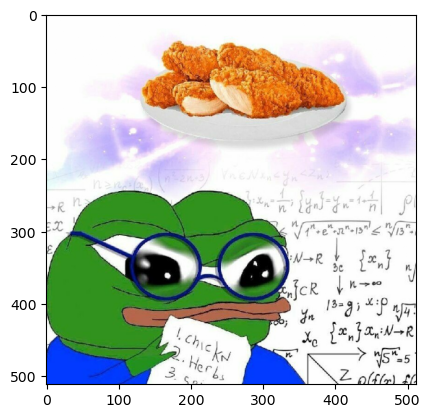

In [68]:
plt.imshow(pepe_tender[0])

In [69]:
test_model.predict(pepe_tender)

1/1 [==============================] - 0s 73ms/step


array([[0.98970884]], dtype=float32)

In [70]:
deep_jak = load_image_and_process('../data/manual-testing/deep-jak.jpg')
deep_jak.shape

(1, 512, 512, 3)

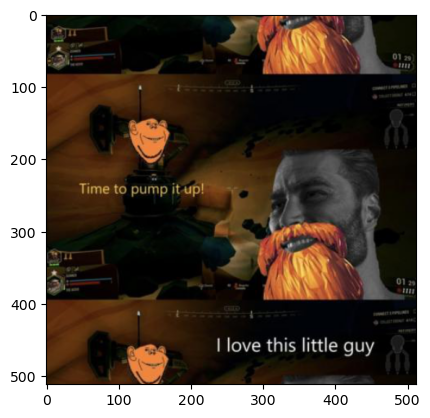

In [71]:
plt.imshow(deep_jak[0])

In [72]:
test_model.predict(deep_jak)

1/1 [==============================] - 0s 37ms/step


array([[0.37548485]], dtype=float32)

In [73]:
water_pepe = load_image_and_process('../data/manual-testing/water-pepe.png')
test_model.predict(water_pepe)

1/1 [==============================] - 0s 27ms/step


array([[0.9843233]], dtype=float32)

In [74]:
paper_pepe = load_image_and_process('../data/manual-testing/paper-pepe.png')
test_model.predict(paper_pepe)

1/1 [==============================] - 0s 25ms/step


array([[0.90302235]], dtype=float32)

In [75]:
nonono = load_image_and_process('../data/manual-testing/nonono.png')
test_model.predict(nonono)

1/1 [==============================] - 0s 26ms/step


array([[0.11302448]], dtype=float32)

In [76]:
soy_jak = load_image_and_process('../data/manual-testing/soyjak.jpg')
test_model.predict(soy_jak)

1/1 [==============================] - 0s 25ms/step


array([[0.12057928]], dtype=float32)